# Airline data

In [34]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("data/Air_Traffic_Passenger_Statistics.csv")

In [3]:
df.shape

(37852, 15)

In [4]:
df.describe()

,Activity Period,Passenger Count
count,37852.000000,37852.000000
mean,201261.456700,27820.665196
std,752.444011,62044.188248
min,199907.000000,0.000000
25%,200608.750000,4363.000000
50%,201306.000000,8600.000000
75%,201905.000000,19711.250000
max,202503.000000,856501.000000


In [6]:
df.head()

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,data_as_of,data_loaded_at
0,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,31432,2025/05/20 01:01:09 PM,2025/05/22 03:02:44 PM
1,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,31353,2025/05/20 01:01:09 PM,2025/05/22 03:02:44 PM
2,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,2518,2025/05/20 01:01:09 PM,2025/05/22 03:02:44 PM
3,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Other,Terminal 2,D,1324,2025/05/20 01:01:09 PM,2025/05/22 03:02:44 PM
4,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Enplaned,Other,Terminal 2,D,1198,2025/05/20 01:01:09 PM,2025/05/22 03:02:44 PM


<Axes: title={'center': 'Top 10 Airlines by Passenger Count'}, ylabel='Operating Airline'>

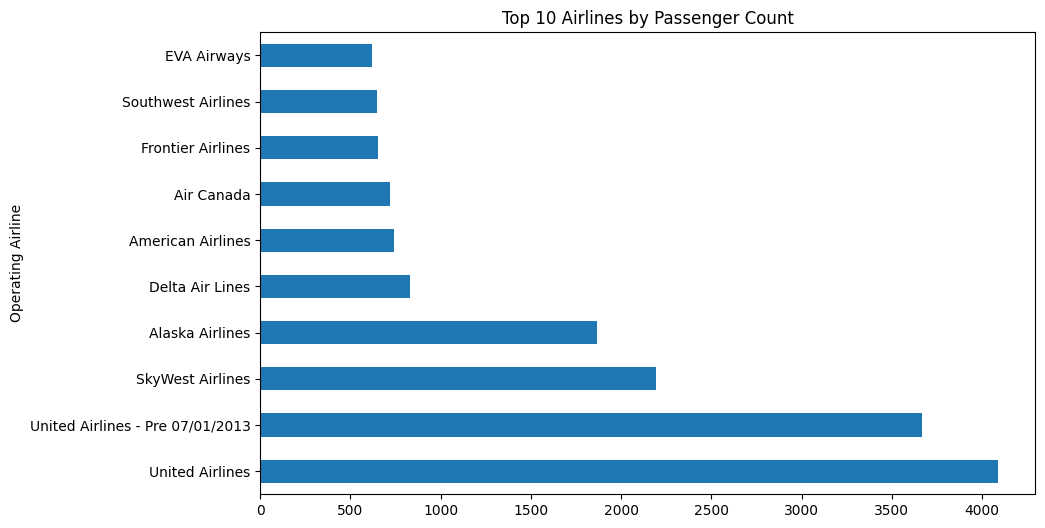

In [10]:
df.groupby("Operating Airline").size().sort_values(ascending=False).head(10).plot(kind="barh", figsize=(10, 6), title="Top 10 Airlines by Passenger Count")

In [14]:
df["date"] = pd.to_datetime(df["Activity Period"], format="%Y%m")

<Axes: xlabel='date'>

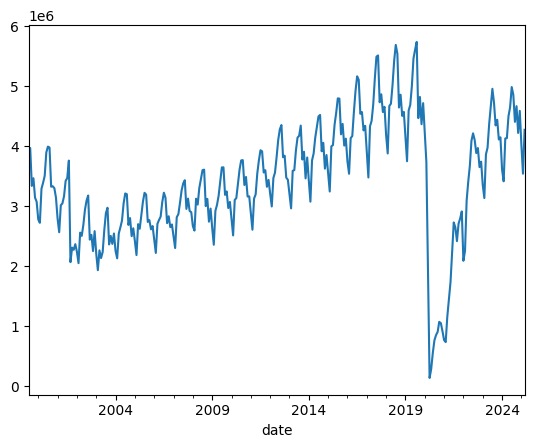

In [18]:
df.groupby("date")["Passenger Count"].sum().plot()

<Axes: xlabel='date'>

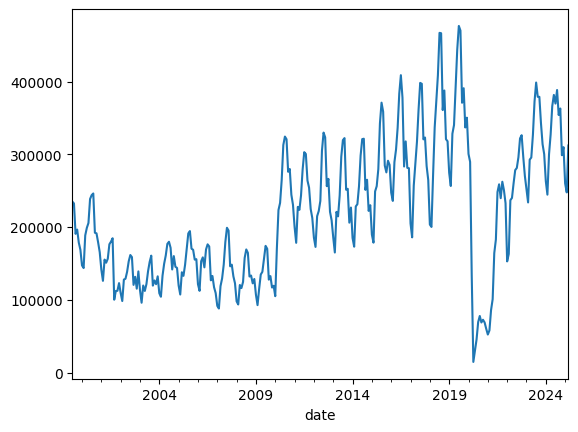

In [23]:
df.loc[df["Operating Airline"] == "Delta Air Lines"].groupby("date")["Passenger Count"].sum().plot()

In [28]:
df["month"] = df["date"].dt.month

<Axes: xlabel='month'>

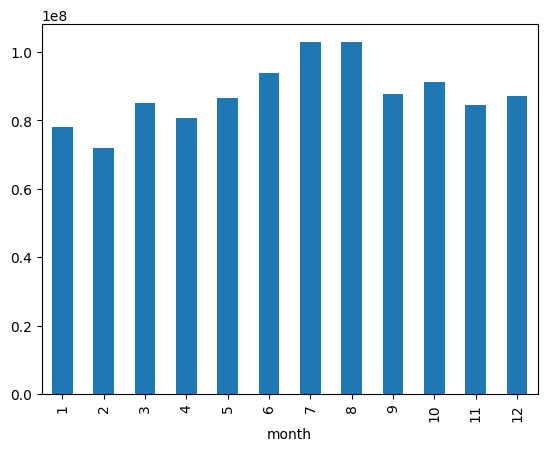

In [33]:
df.groupby("month")["Passenger Count"].sum().plot(kind="bar")

In [30]:
fit = LinearRegression()
X = df[["month"]]
y = df["Passenger Count"]
fit.fit(X, y)
fit.coef_, fit.intercept_

(array([303.70994178]), np.float64(25835.95137674077))

y = a x + b

Passenger Count = a month + b

Passenger Count = 303 month + 25835

What passenger count should I expect in September?

Passenger Count[September] = 303 * 9 + 25835 = 303 * 9 + 28562

month    jan feb .... dec
2          0   1        0
12         0   0        1

In [39]:
X_onehot = OneHotEncoder().fit_transform(df[["month"]]).toarray()

In [40]:
fit.fit(X_onehot, y)
fit.coef_, fit.intercept_

(array([-3209.29041733, -4745.54812648,  -870.83799554,  -616.63039507,
          795.72322728,  2400.86642952,  3753.63571104,  3710.17020256,
         -536.37090612,   629.53757632, -1020.41904255,  -290.83626362]),
 np.float64(27799.96631412458))